## Regression Model on Admission Predicting 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# to make this notebook's output stable across runs


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12



# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('score_dataset.csv',sep=',')
df.drop('Serial No.',axis = 1,inplace = True)
df.columns = ['GRE', 'TOEFL', 'University Rating','SOP','LOR','CGPA','Research','Chance of Admit']
np.random.seed(0)
df_explore = df.copy()

In [3]:
df_explore.shape

(500, 8)

In [4]:
df_explore.dtypes

GRE                    int64
TOEFL                  int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [5]:
df_explore.sample(10, random_state=0)

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
90,318,106,2,4.0,4.0,7.92,1,0.64
254,321,114,4,4.0,5.0,9.12,0,0.85
283,321,111,3,2.5,3.0,8.90,1,0.80
445,328,116,5,4.5,5.0,9.08,1,0.91
461,301,102,3,2.5,2.0,8.13,1,0.68
15,314,105,3,3.5,2.5,8.30,0,0.54
316,298,101,2,1.5,2.0,7.86,0,0.54
489,302,110,3,4.0,4.5,8.50,0,0.65
159,297,100,1,1.5,2.0,7.90,0,0.52
153,324,105,3,3.0,4.0,8.75,0,0.79


### Missing Values 

In [6]:

df_explore=df_explore.replace('?',np.nan)
print('Number of instances=%d'%(df_explore.shape[0]))
print('Number of attributes=%d'%(df_explore.shape[1]))

print('Number pf missing values:')
for column in df_explore.columns:
    print('\t%s: %d'%(column,df_explore[column].isna().sum()))

Number of instances=500
Number of attributes=8
Number pf missing values:
	GRE: 0
	TOEFL: 0
	University Rating: 0
	SOP: 0
	LOR: 0
	CGPA: 0
	Research: 0
	Chance of Admit: 0


In [7]:
dep_var = ['Chance of Admit']

categorical_vars = ['Research']

discrete_vars = ['GRE','TOEFL','University Rating']

continuous_vars = ['SOP','LOR','CGPA']

### Explore: quantitative features
Let's start by looking at our quantitative (numerical) features. We use DataFrame.describe() to see some summary statistics of each numeric column.

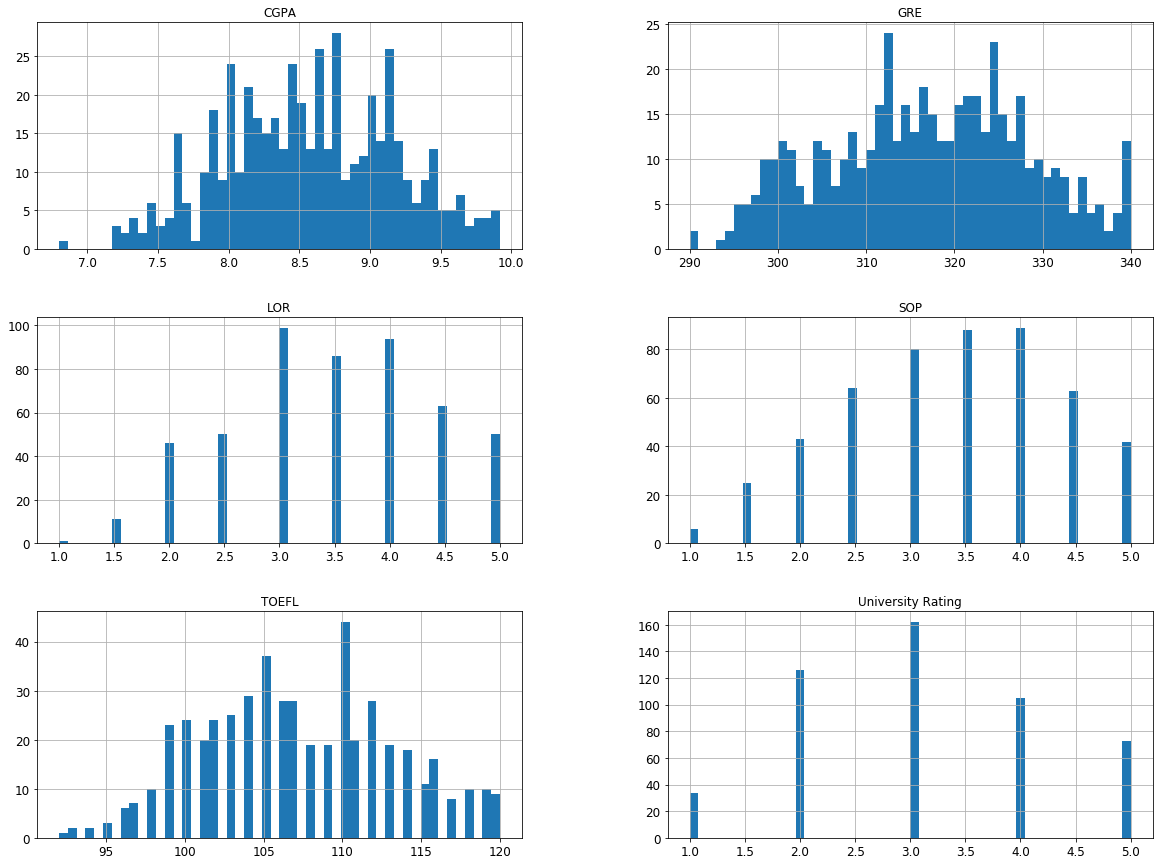

In [8]:
df_explore.loc[:, discrete_vars + continuous_vars].hist(bins=50, figsize=(20,15))
plt.show()

### Categorical Values

In [9]:
for i in categorical_vars:
    print(df_explore[i].value_counts())
    print()

1    280
0    220
Name: Research, dtype: int64



In [10]:
df_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE                  500 non-null int64
TOEFL                500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [11]:
dataset=df.copy()

In [12]:
print(dataset.shape)
dataset.describe()

(500, 8)


,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


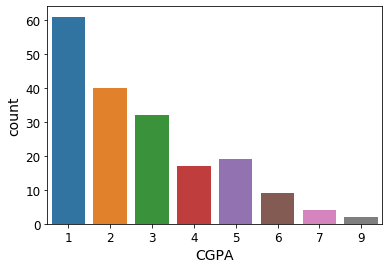

In [13]:
sns.countplot(dataset['CGPA'].value_counts())

### Correlation Analysis 

In [14]:
dataset.corr(method="pearson")

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


Text(0.5, 1, 'Pearsons Correlation Factors Heat Map')

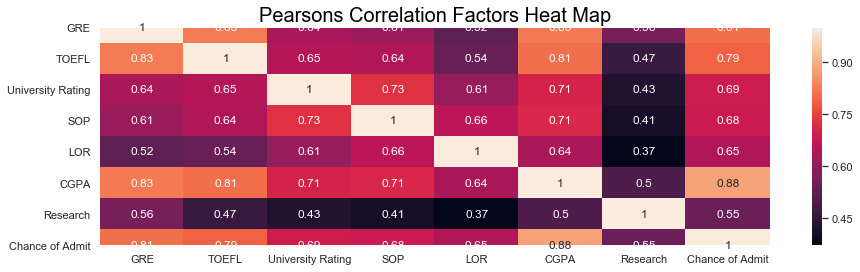

In [15]:
corr = dataset.corr() #saving the correlation for later use
ax = sns.set(rc={'figure.figsize':(15,4)})
sns.heatmap(corr, annot=True).set_title('Pearsons Correlation Factors Heat Map', color='black', size='20')

### Analysing the Chance of Admit if gre and toefl are greater that 85 percent

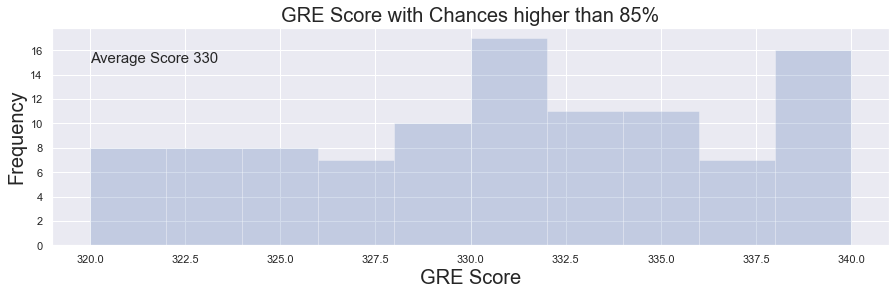

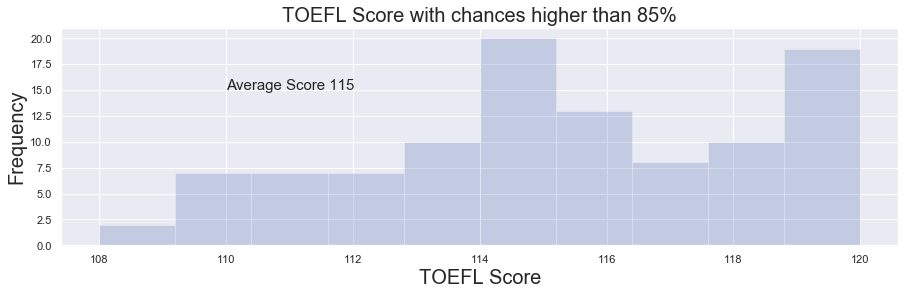

In [16]:
dataset[dataset['Chance of Admit'] > 0.85]['GRE'].plot(kind = 'hist',x = 'GRE',alpha = 0.25)
plt.text(320, 15, 'Average Score %d' %(int(np.mean(dataset[dataset['Chance of Admit'] > 0.85]['GRE']))), fontsize=15)
plt.xlabel('GRE Score',fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('GRE Score with Chances higher than 85%',fontsize = 20)
plt.show()

dataset[dataset['Chance of Admit'] > 0.85]['TOEFL'].plot(kind = 'hist',x = 'TOEFL',alpha = 0.25)
plt.text(110, 15, 'Average Score %d' %(int(np.mean(dataset[dataset['Chance of Admit'] > 0.85]['TOEFL']))), fontsize=15)
plt.xlabel('TOEFL Score',fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('TOEFL Score with chances higher than 85%',fontsize = 20)
plt.show()

#### University Ratings values

In [17]:
dataset['University Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

### The chance of admit if university rating is 4 and have done research

In [18]:
dataset[(dataset['University Rating'] >= 4) & (dataset['Research'] == 1)].sort_values(by = ['Chance of Admit']).head(5)

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
492,298,101,4,2.5,4.5,7.69,1,0.53
412,314,102,4,2.5,2.0,7.88,1,0.59
406,322,103,4,3.0,2.5,8.02,1,0.61
115,310,106,4,4.5,4.5,9.04,1,0.66
474,308,105,4,3.0,2.5,7.95,1,0.67


#### Analysis on LOR and SOP - finding average value

Average SOP : 3
Average LOR : 3


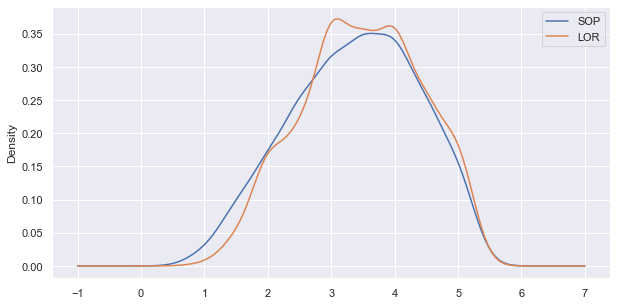

In [19]:
print('Average SOP :', int(np.mean(dataset['SOP'])))
print('Average LOR :', int(np.mean(dataset['LOR'])))
plt.rcParams['figure.figsize'] = 10,5

dataset['SOP'].plot(kind = 'kde')
dataset['LOR'].plot(kind = 'kde')
plt.legend(['SOP','LOR'])
#dataset['CGPA'].plot(kind = 'hist',density = True,color = 'y',alpha = 0.25)

## Training the data with regression model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [21]:
X = dataset.iloc[:,:-1].values # Independent Variables
Y = dataset.iloc[:,7].values # Dependent Variables

### Train-Test Split

In [22]:
#Splitting it into train and test dataset
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size = 0.2,random_state = 0) 
print(train_X.shape,train_Y.shape,test_X.shape,test_Y.shape)# Splitting it into 400 train and 100 test data set

(400, 7) (400,) (100, 7) (100,)


In [23]:
##Normalization

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [25]:
 num_pipeline.fit(train_X,train_Y)

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

### Model Fitting

In [26]:
reg = LinearRegression()
reg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
pred = reg.predict(test_X)
pred

array([0.6606252 , 0.83467888, 0.77803235, 0.88054515, 0.60126564,
       0.64356569, 0.53081352, 0.69581338, 0.52494695, 0.74711904,
       0.61091713, 0.70857888, 0.62202889, 0.75371215, 0.88455163,
       0.50857541, 0.82439288, 0.64614159, 0.7656139 , 0.53346257,
       0.51561087, 0.72319839, 0.52118775, 0.92174074, 0.8332172 ,
       0.72651112, 0.69865521, 0.50871376, 0.58246086, 0.59618334,
       0.72743587, 0.48564416, 0.65331018, 0.8414552 , 0.56459962,
       0.59803765, 0.84391714, 0.86746389, 0.59031772, 0.65993134,
       0.67020768, 0.90220251, 0.86565391, 0.72223457, 0.77319666,
       0.8068659 , 0.97014963, 0.85112801, 0.6429692 , 0.65569499,
       0.63193629, 0.6367591 , 0.61353916, 0.80117655, 0.6942999 ,
       0.85574591, 0.52489959, 0.86276624, 0.60022041, 0.63653589,
       0.49798224, 0.90699384, 0.61965598, 0.94547309, 0.7196482 ,
       0.61602013, 0.73614278, 0.8434937 , 0.519103  , 0.77895777,
       0.8947432 , 0.78381774, 0.69730948, 0.63992055, 0.78922

### Error and Accuracy prediction

In [28]:
print('Mean Square Error is: ', mean_squared_error(test_Y,pred))
print('Model Accuracy Score : ',r2_score(test_Y,pred))

Mean Square Error is:  0.004079680034602105
Model Accuracy Score :  0.7664048993199384


### Plot for Regression

Root mean squared error = 0.0639
R-squared = 0.7664


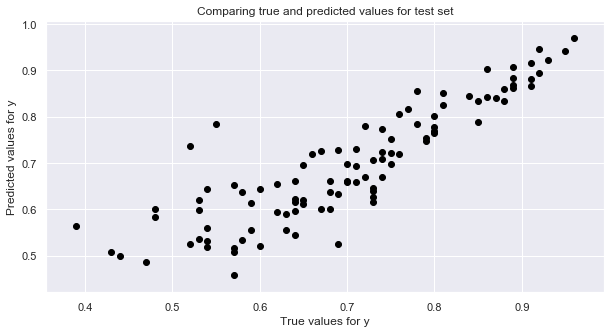

In [29]:
# Comparing true versus predicted values
plt.scatter(test_Y, pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(test_Y, pred)))
print('R-squared = %.4f' % r2_score(test_Y, pred))

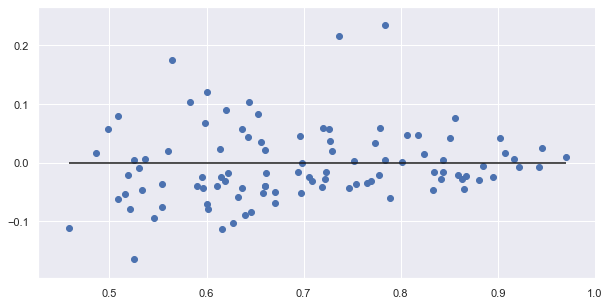

In [30]:
plt.scatter(reg.predict(test_X),reg.predict(test_X) - test_Y, c = 'b')
plt.hlines(y = 0,xmin = min(reg.predict(test_X)),xmax = max(reg.predict(test_X)))

#### Non Linear Regression - Polynomial 

In [31]:

polynomial_3 = PolynomialFeatures(degree = 3)   # Degree 3
polynomial_x_3 = polynomial_3.fit_transform(train_X)
polynomial_3.fit(polynomial_x_3, train_Y)


PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [32]:

model_poly_3 = LinearRegression() # Degree 3
model_poly_3.fit(polynomial_x_3,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:

pred_3 = model_poly_3.predict(polynomial_3.fit_transform(test_X)) # Degree 3
pred_3

array([0.67972375, 0.79440858, 0.85169558, 0.85395379, 0.62300368,
       0.66357731, 0.50096497, 0.6805485 , 0.57674397, 0.74150772,
       0.63478004, 0.72472655, 0.64479665, 0.76633235, 0.87836517,
       0.47640422, 0.83538205, 0.58213819, 0.70327932, 0.48437703,
       0.53156928, 0.7810872 , 0.62496397, 0.93122735, 0.92527112,
       0.8952686 , 0.79172634, 0.55762687, 0.5937112 , 0.62708113,
       0.6835358 , 0.51476645, 0.57721448, 0.78386783, 0.59611119,
       0.48810304, 0.89180449, 0.85876685, 0.60034052, 0.62763067,
       0.61647578, 0.84036491, 0.88020227, 0.70755605, 0.78250621,
       0.8357421 , 0.99218605, 0.88729906, 0.5163655 , 0.64768195,
       0.65633851, 0.6478711 , 0.63005465, 0.81164823, 0.54577637,
       0.85512577, 0.51056966, 0.86697803, 0.57118353, 0.65520516,
       0.50083389, 0.95233435, 0.5710035 , 0.81996314, 0.66515729,
       0.62499628, 0.74440469, 0.86272498, 0.50196972, 0.82932199,
       0.92517588, 0.75031993, 0.71860503, 0.62471727, 0.81585

### Error and Accuracy prediction

In [34]:

print('Mean Square Error for Polynomial degree 3 is: ', mean_squared_error(test_Y,pred_3))
print('Model Accuracy Score for Polynomial degree 3 is : ',r2_score(test_Y,pred_3))

Mean Square Error for Polynomial degree 3 is:  0.005541231405007534
Model Accuracy Score for Polynomial degree 3 is :  0.6827191110661456


#### Plot for Polynomial Regression

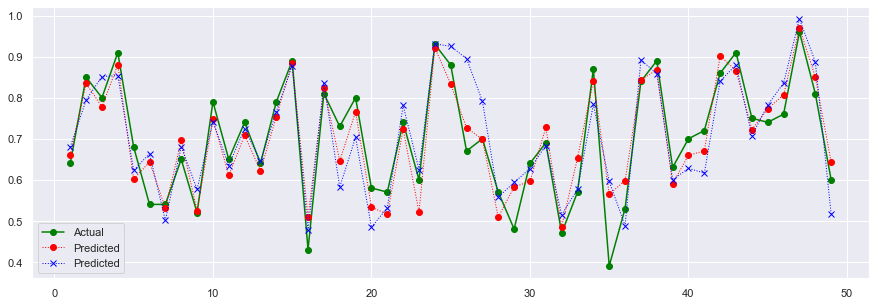

In [35]:
plt.figure(figsize=(15,5))
x = np.arange(1,50)
plt.plot(x,test_Y[:49], '-o', label='Actual',color ='green')
plt.plot(x, pred[:49], ':o', label='Predicted',color = 'red',linewidth = 1)
plt.plot(x, pred_3[:49], ':x', label='Predicted',color = 'blue',linewidth = 1)
plt.legend()

## Lasso Regression

In [36]:
#Splitting it into train and test dataset
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size = 0.2,random_state = 0) 
print(train_X.shape,train_Y.shape,test_X.shape,test_Y.shape)# Splitting it into 400 train and 100 test data set

(400, 7) (400,) (100, 7) (100,)


In [37]:
from sklearn.linear_model import Lasso
ls = Lasso(normalize=False, max_iter=100000,tol=1.0)
ls.fit(train_X,train_Y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=1.0, warm_start=False)

In [38]:
def rmse(a, b):
    return np.sqrt(np.mean((a-b)**2))

In [39]:
y_pred=ls.predict(train_X)

print("Rmse",rmse(train_Y,y_pred))

Rmse 0.12064053471334309


In [40]:
ls.fit(test_X,test_Y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=1.0, warm_start=False)

In [41]:
y_pred=ls.predict(test_X)

print("Rmse",rmse(test_Y,y_pred))

Rmse 0.123373148298549


## Ridge Regression

In [42]:
from sklearn.linear_model import Ridge
rd = Ridge(normalize=False, max_iter=100000,tol=1.0)
rd.fit(train_X,train_Y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, random_state=None, solver='auto', tol=1.0)

In [43]:
y_pred=rd.predict(train_X)

print("Rmse",rmse(train_Y,y_pred))

Rmse 0.05848989759177301


In [44]:
ls.fit(test_X,test_Y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=1.0, warm_start=False)

In [46]:
y_pred=rd.predict(test_X)

print("Rmse",rmse(test_Y,y_pred))

Rmse 0.06394657764105441
